Pre Meditation and Post Meditation Analysis

In [2]:
import brainsurf.data.mff as input_load

In [3]:
suriya_baseline = input_load.convert_mff_to_eegdata("C:/Users/Preethi V Hiremath/Downloads/Meditators/Suriya/BS.mff")
suriya_meditation = input_load.convert_mff_to_eegdata("C:/Users/Preethi V Hiremath/Downloads/Meditators/Suriya/M1.mff")
suriya_transmission = input_load.convert_mff_to_eegdata("C:/Users/Preethi V Hiremath/Downloads/Meditators/Suriya/T1.mff")
suriya_post = input_load.convert_mff_to_eegdata("C:/Users/Preethi V Hiremath/Downloads/Meditators/Suriya/P1.mff")

Reading EGI MFF Header from C:\Users\Preethi V Hiremath\Downloads\Meditators\Suriya\BS.mff...
    Reading events ...
    Assembling measurement info ...
Reading EGI MFF Header from C:\Users\Preethi V Hiremath\Downloads\Meditators\Suriya\M1.mff...
    Reading events ...
    Assembling measurement info ...
Reading EGI MFF Header from C:\Users\Preethi V Hiremath\Downloads\Meditators\Suriya\T1.mff...
    Reading events ...
    Assembling measurement info ...
Reading EGI MFF Header from C:\Users\Preethi V Hiremath\Downloads\Meditators\Suriya\P1.mff...
    Reading events ...
    Assembling measurement info ...


In [4]:
suriya_baseline.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E121,E122,E123,E124,E125,E126,E127,E128,Vertex Reference,sec
0,-0.012650,-0.006606,0.002758,0.002042,0.000380,0.001469,0.004418,-0.017802,-0.013326,0.008499,...,-0.013461,-0.009211,-0.003504,0.002472,-0.020046,-0.016379,-0.015446,-0.017229,0.0,0.000
1,-0.012611,-0.006578,0.002774,0.002052,0.000384,0.001460,0.004402,-0.017772,-0.013299,0.008510,...,-0.013424,-0.009178,-0.003483,0.002486,-0.020009,-0.016357,-0.015425,-0.017193,0.0,0.004
2,-0.012550,-0.006531,0.002812,0.002086,0.000413,0.001455,0.004396,-0.017716,-0.013255,0.008542,...,-0.013362,-0.009119,-0.003441,0.002525,-0.019946,-0.016304,-0.015388,-0.017120,0.0,0.008
3,-0.012563,-0.006539,0.002816,0.002097,0.000427,0.001462,0.004409,-0.017721,-0.013259,0.008552,...,-0.013376,-0.009128,-0.003443,0.002531,-0.019949,-0.016318,-0.015384,-0.017133,0.0,0.012
4,-0.012594,-0.006560,0.002799,0.002082,0.000416,0.001462,0.004414,-0.017746,-0.013280,0.008537,...,-0.013406,-0.009157,-0.003462,0.002513,-0.019976,-0.016339,-0.015397,-0.017180,0.0,0.016


# Sampling Frequency Cailculation


In [5]:
import numpy as np
import brainsurf.utils.data as util
values = np.asarray(suriya_baseline['sec'], dtype=object)
sampling_freq = util.estimate_sampling_frequency(values)
print(sampling_freq)

250.0


# Statistial Comparision

In [6]:
from scipy import stats
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, f_oneway
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import seaborn as sns


### Inference
please write down what the inference is

In [7]:
def calculate_cohens_d(x1, x2):
    # Calculate the means and standard deviations of the two samples
    mean1, mean2 = np.mean(x1), np.mean(x2)
    std1, std2 = np.std(x1, ddof=1), np.std(x2, ddof=1)

    # Calculate the pooled standard deviation
    pooled_std = np.sqrt(((len(x1) - 1) * std1 ** 2 + (len(x2) - 1) * std2 ** 2) / (len(x1) + len(x2) - 2))

    # Calculate Cohen's d
    cohens_d = (mean1 - mean2) / pooled_std

    return cohens_d


def compare_eeg_datax(df1, df2):
    # Select only the EEG channels (E1 to E128) and exclude unnecessary columns
    eeg_columns = df1.columns[:-2]  # Assuming the first two columns are time and vertices
    df1 = df1[eeg_columns]
    df2 = df2[eeg_columns]

    # Create an empty DataFrame to store the statistics
    result_df = pd.DataFrame(index=eeg_columns)

    # Calculate mean and variance for each channel
    result_df['Mean_df1'] = df1.mean()
    result_df['Mean_df2'] = df2.mean()
    result_df['Variance_df1'] = df1.var()
    result_df['Variance_df2'] = df2.var()

    # Calculate standard deviation for each channel
    result_df['Standard Deviation_df1'] = df1.std()
    result_df['Standard Deviation_df2'] = df2.std()

    # Calculate t-test and effect size (Cohen's d) for each channel
    ttest_results = []
    effect_sizes = []
    for column in eeg_columns:
        t, p = ttest_ind(df1[column], df2[column])
        ttest_results.append(t)
        d = calculate_cohens_d(df1[column], df2[column])
        effect_sizes.append(d)
    result_df['T-test'] = ttest_results
    result_df['Effect Size'] = effect_sizes

    # Calculate ANOVA for each channel
    anova_results = []
    for column in eeg_columns:
        f, p = f_oneway(df1[column], df2[column])
        anova_results.append(f)
    result_df['ANOVA'] = anova_results

    return result_df


In [10]:
def visualize_comparison(comparison_result):
    # Extract the channels as the x-axis labels
    channels = comparison_result.index

    # Get the mean, variance, standard deviation, t-test, ANOVA, and effect size values
    mean_df1 = comparison_result['Mean_df1']
    mean_df2 = comparison_result['Mean_df2']
    variance_df1 = comparison_result['Variance_df1']
    variance_df2 = comparison_result['Variance_df2']
    std_df1 = comparison_result['Standard Deviation_df1']
    std_df2 = comparison_result['Standard Deviation_df2']
    ttest_df = comparison_result['T-test']
    anova_df = comparison_result['ANOVA']
    effect_size_df = comparison_result['Effect Size']

        # Plotting mean values
    plt.figure(figsize=(18, 10))

    plt.subplot(2, 3, 1)
    plt.plot(channels, mean_df1, label='df1', marker='o')
    plt.plot(channels, mean_df2, label='df2', marker='o')
    plt.title('Mean Comparison')
    plt.xlabel('Channels')
    plt.ylabel('Mean')
    plt.xticks(rotation=90)
    plt.legend()

    # Plotting variance values
    plt.subplot(2, 3, 2)
    plt.plot(channels, variance_df1, label='df1', marker='o')
    plt.plot(channels, variance_df2, label='df2', marker='o')
    plt.title('Variance Comparison')
    plt.xlabel('Channels')
    plt.ylabel('Variance')
    plt.xticks(rotation=90)
    plt.legend()

    # Plotting standard deviation values
    plt.subplot(2, 3, 3)
    plt.plot(channels, std_df1, label='df1', marker='o')
    plt.plot(channels, std_df2, label='df2', marker='o')
    plt.title('Standard Deviation Comparison')
    plt.xlabel('Channels')
    plt.ylabel('Standard Deviation')
    plt.xticks(rotation=90)
    plt.legend()

    # Plotting t-test results
    plt.subplot(2, 3, 4)
    plt.plot(channels, ttest_df, marker='o')
    plt.title('T-test Comparison')
    plt.xlabel('Channels')
    plt.ylabel('T-test')
    plt.xticks(rotation=90)

    # Plotting ANOVA results
    plt.subplot(2, 3, 5)
    plt.plot(channels, anova_df, marker='o')
    plt.title('ANOVA Comparison')
    plt.xlabel('Channels')
    plt.ylabel('ANOVA')
    plt.xticks(rotation=90)

    # Plotting effect size results
    plt.subplot(2, 3, 6)
    plt.plot(channels, effect_size_df, marker='o')
    plt.title('Effect Size Comparison')
    plt.xlabel('Channels')
    plt.ylabel('Effect Size')
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()




## Comparision between BASELINE AND POST

In [11]:
# Call the function to compare the EEG data
comparison_result = compare_eeg_datax(suriya_baseline, suriya_post)
print(comparison_result.head())

    Mean_df1  Mean_df2  Variance_df1  Variance_df2  Standard Deviation_df1   
E1 -0.012968 -0.017287  2.358705e-08  1.091223e-08                0.000154  \
E2 -0.006689 -0.009872  2.707744e-08  6.840597e-08                0.000165   
E3  0.003093  0.004706  3.786793e-08  3.246320e-08                0.000195   
E4  0.002382  0.004456  3.308424e-08  1.161044e-07                0.000182   
E5  0.000636  0.005120  1.465239e-08  1.259507e-07                0.000121   

    Standard Deviation_df2       T-test  Effect Size         ANOVA  
E1                0.000104  6367.840703    32.883388  4.054940e+07  
E2                0.000262  2821.457783    14.569945  7.960624e+06  
E3                0.000180 -1665.399289    -8.600085  2.773555e+06  
E4                0.000341 -1470.732098    -7.594828  2.163053e+06  
E5                0.000355 -3274.938649   -16.911710  1.072522e+07  


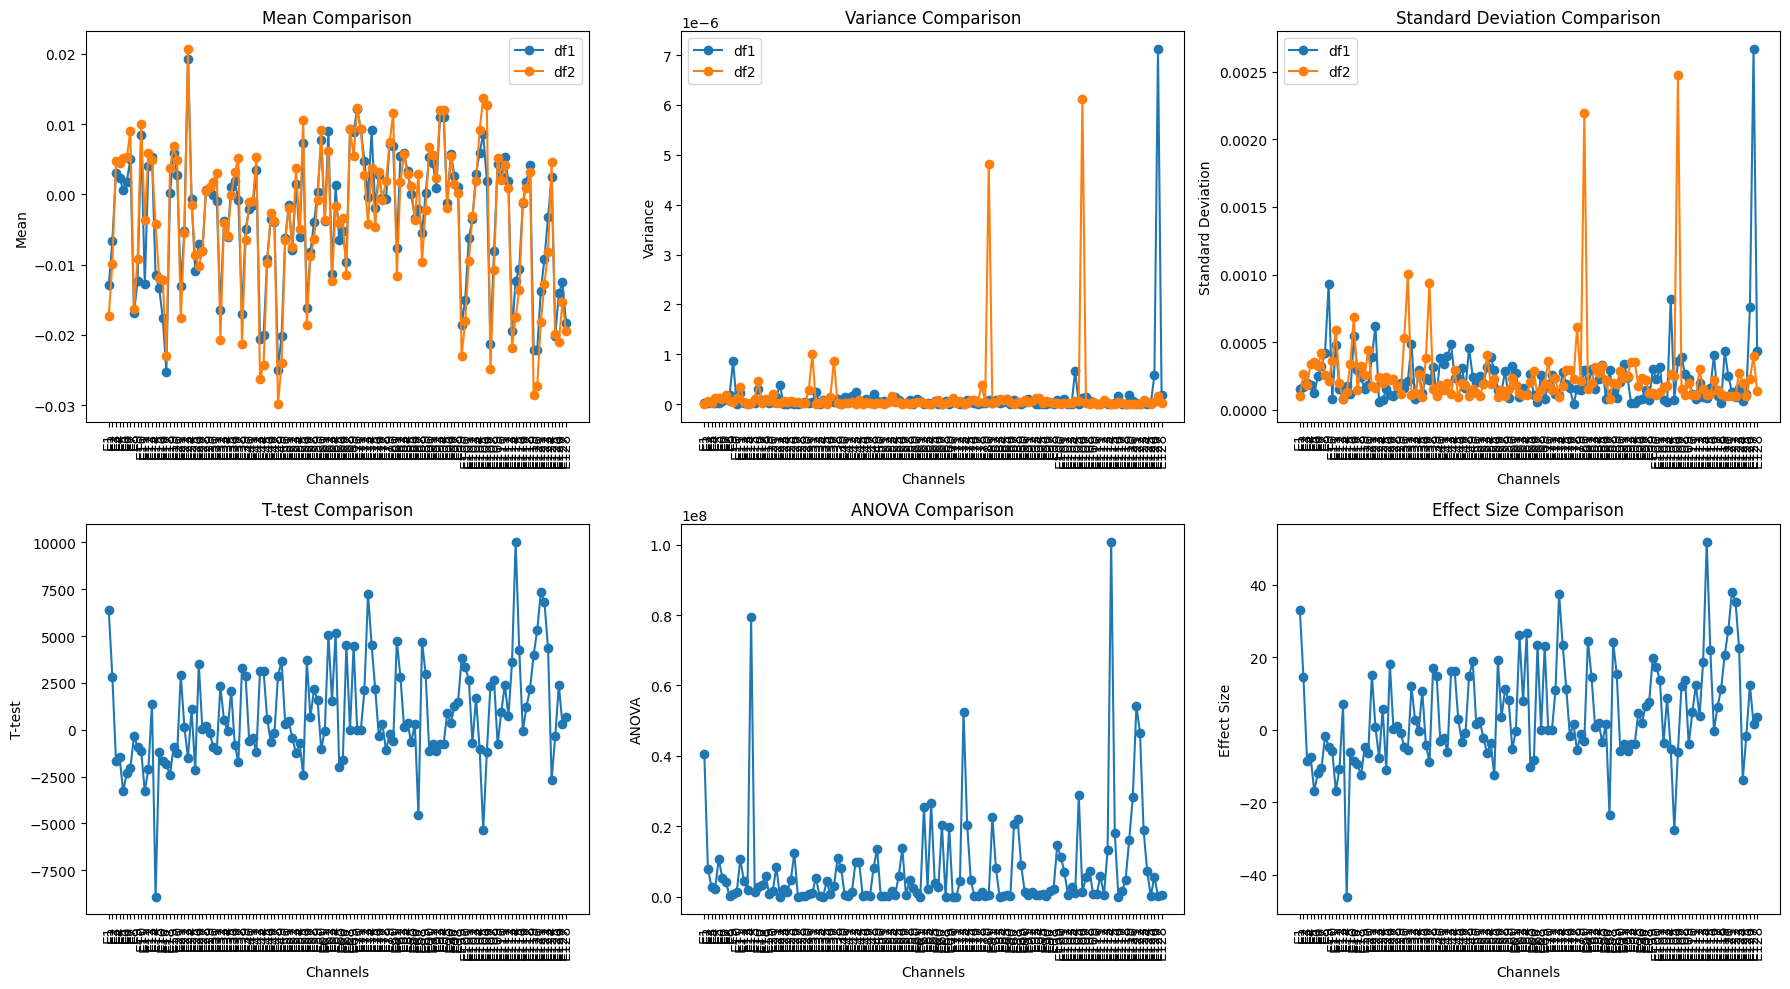

In [12]:
visualize_comparison(comparison_result)

## Comparision between Meditation and Transmission

In [13]:
# Call the function to compare the EEG data
comparison_types = compare_eeg_datax(suriya_meditation, suriya_transmission)
print(comparison_types.head())

    Mean_df1  Mean_df2  Variance_df1  Variance_df2  Standard Deviation_df1   
E1 -0.015460 -0.014214  1.640918e-07  1.244471e-07                0.000405  \
E2 -0.009783 -0.008584  8.905009e-08  1.651796e-07                0.000298   
E3  0.004164  0.003932  5.327511e-09  1.065619e-08                0.000073   
E4  0.003369  0.003231  4.392898e-09  8.426567e-09                0.000066   
E5  0.003122  0.001688  1.611434e-07  1.213146e-07                0.000401   

    Standard Deviation_df2      T-test  Effect Size          ANOVA  
E1                0.000353 -635.395806    -3.281170  403727.830163  
E2                0.000406 -651.022693    -3.361867  423830.546872  
E3                0.000103  501.266841     2.588531  251268.445488  
E4                0.000092  333.475552     1.722060  111205.943465  
E5                0.000348  738.741478     3.814845  545738.970749  


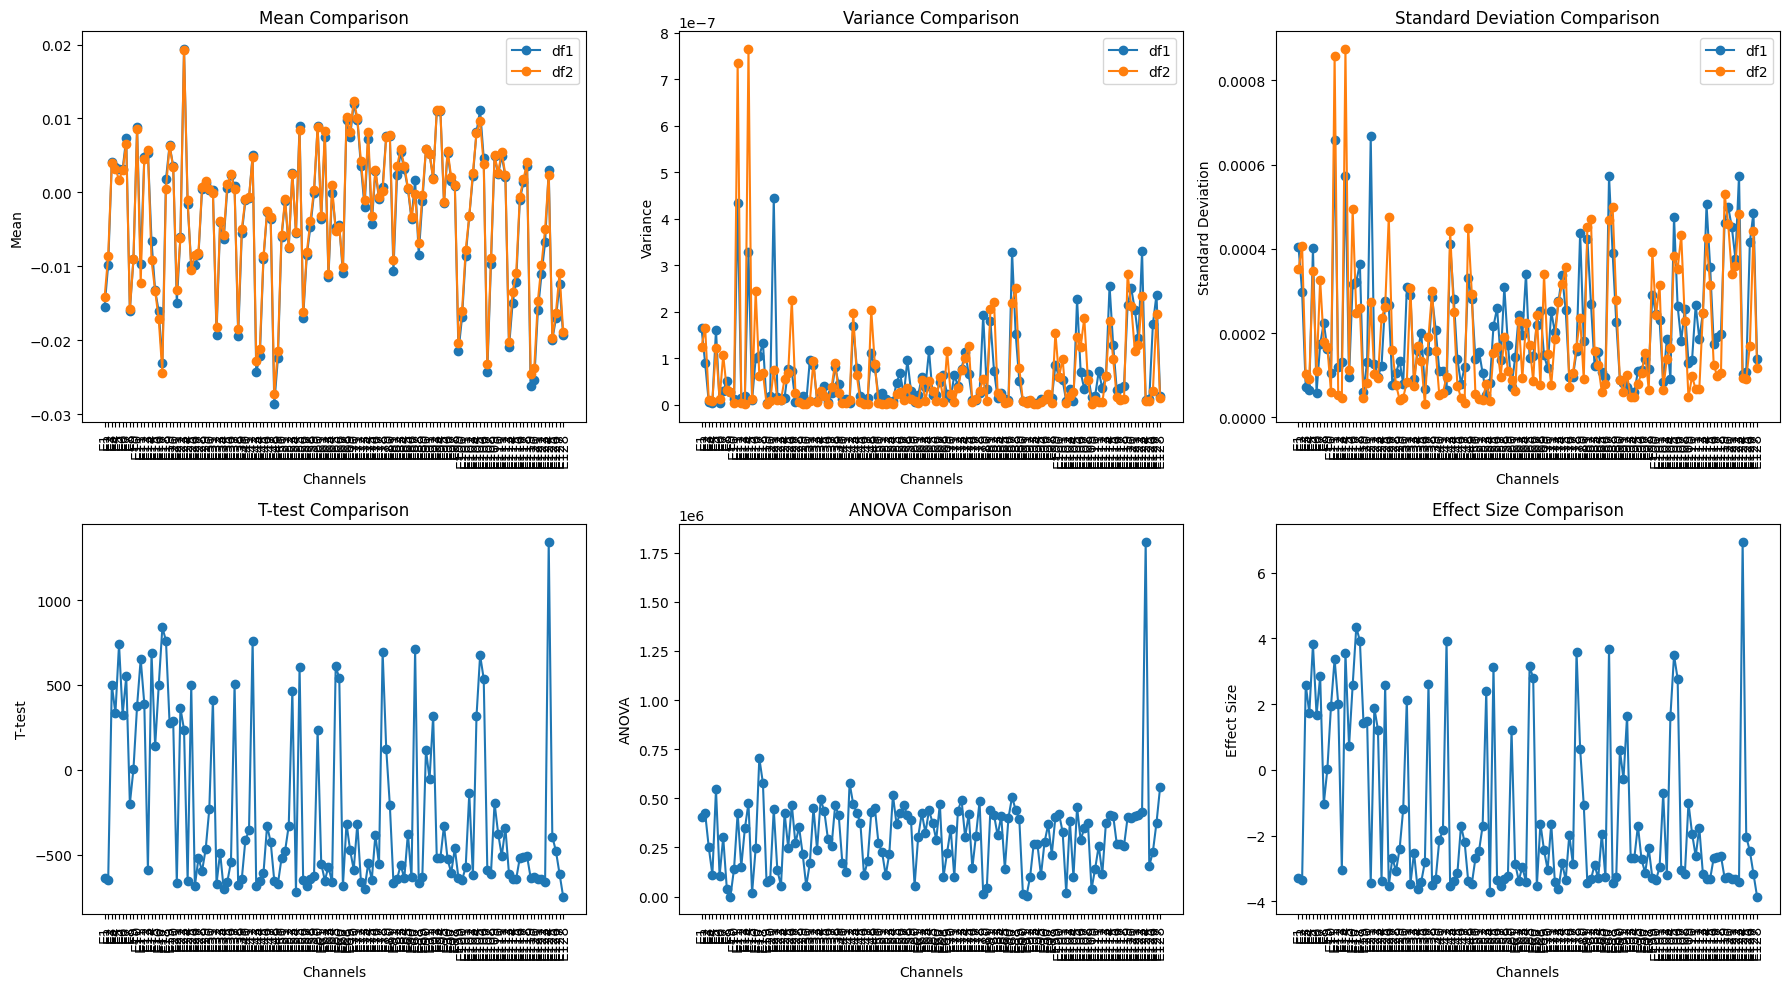

In [14]:
visualize_comparison(comparison_types)

# Parietal and Frontal

In [ ]:
import networkx as nx

def connectivity_parietal_frontal(parietal_channels, frontal_channels):
    # Select the EEG channels corresponding to the parietal and frontal lobes
    # Compute the correlation matrix from EEG data.
    # Calculate connectivity measures (e.g., correlation, coherence, spectral analysis)
    connectivity_measure = np.corrcoef(parietal_channels.T, frontal_channels.T)  # Example: using correlation coefficient
    # Construct a network graph from the connectivity matrix
    # graph = nx.from_numpy_array(connectivity_measure)

    # Calculate network measures
    # node_degree = dict(graph.degree())
    # clustering_coefficient = nx.clustering(graph)
    # betweenness_centrality = nx.betweenness_centrality(graph)

    # # Print network measures
    # print("Node Degree:")
    # for node, degree in node_degree.items():
    #     print(f"Channel {node}: {degree}")

    # print("\nClustering Coefficient:")
    # for node, coefficient in clustering_coefficient.items():
    #     print(f"Channel {node}: {coefficient}")

    # print("\nBetweenness Centrality:")
    # for node, centrality in betweenness_centrality.items():
    #     print(f"Channel {node}: {centrality}")

    return connectivity_measure


In [ ]:
parietal_channels = suriya_baseline.filter(regex='E[4-9][0-9]|E[5-8][0-9]|E90|E[1-5][0-9]|E60')
frontal_channels = suriya_baseline.filter(regex='E[1-4][0-9]|E5[0-6]')


In [ ]:
pre_meditation_result = connectivity_parietal_frontal(parietal_channels, frontal_channels)

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(pre_meditation_result, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Connectivity Matrix - Pre-meditation')
plt.xlabel('Frontal Channels')
plt.ylabel('Parietal Channels')
plt.show()

KeyboardInterrupt: 

c:\Users\Preethi V Hiremath\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)
c:\Users\Preethi V Hiremath\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Preethi V Hiremath\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 800x600 with 0 Axes>

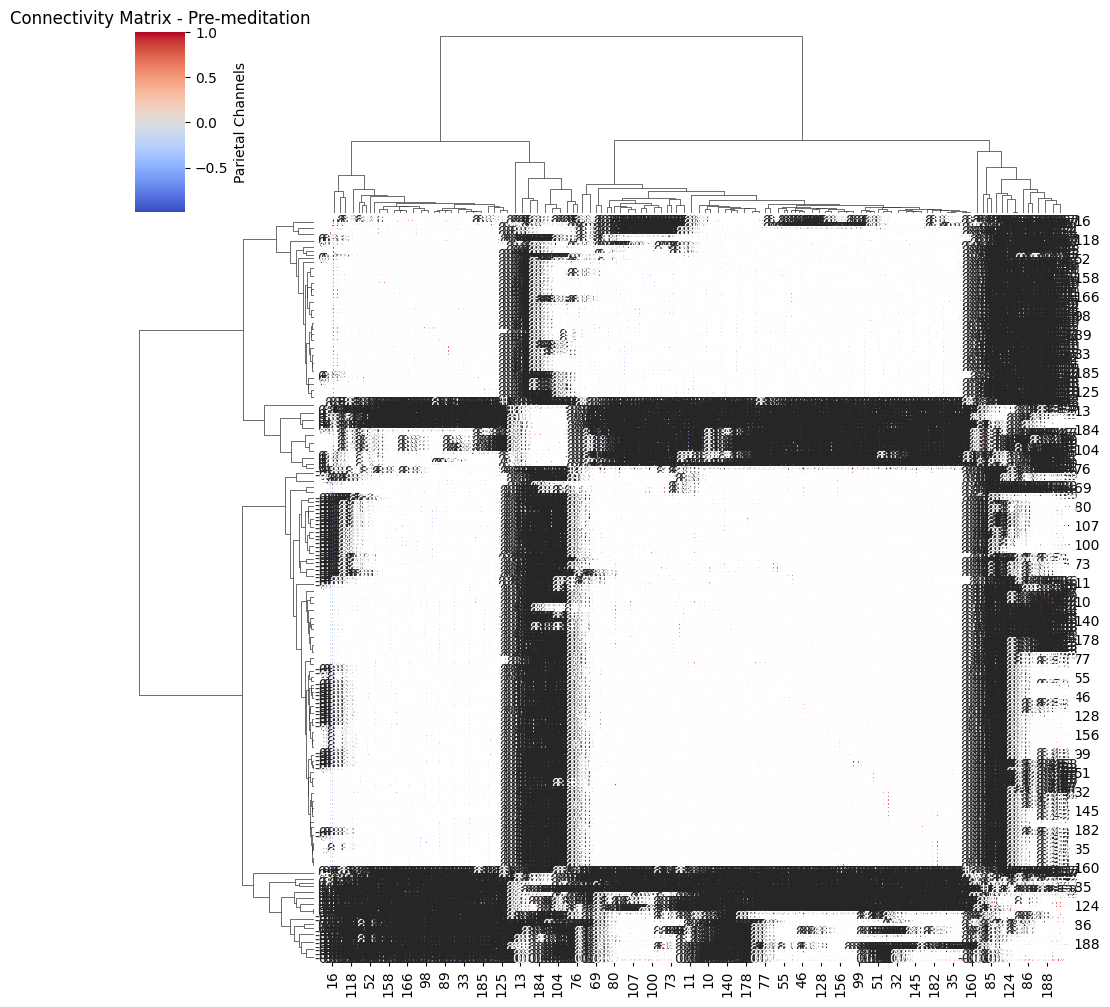

In [ ]:
plt.figure(figsize=(8, 6))
sns.clustermap(pre_meditation_result, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Connectivity Matrix - Pre-meditation')
plt.xlabel('Frontal Channels')
plt.ylabel('Parietal Channels')
plt.show()

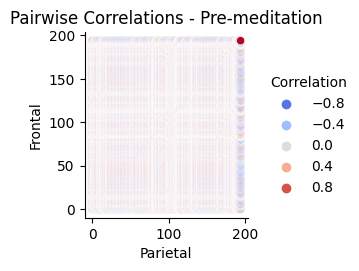

In [ ]:
import seaborn as sns

# Convert the correlation matrix to a DataFrame
corr_df = pd.DataFrame(pre_meditation_result)

# Flatten the DataFrame to long format for pairplot
corr_df = corr_df.stack().reset_index()
corr_df.columns = ['Channel 1', 'Channel 2', 'Correlation']

# Create pairplot
sns.pairplot(corr_df, x_vars='Channel 1', y_vars='Channel 2', hue='Correlation', palette='coolwarm')
plt.title('Pairwise Correlations - Pre-meditation')
plt.xlabel('Parietal')
plt.ylabel('Frontal')
plt.show()


In [ ]:

def compare_pre_post_meditation(pre_data, post_data):
    """
    Compare connectivity between pre-meditation and post-meditation data.

    Args:
        pre_data (np.ndarray): EEG data matrix for pre-meditation with shape (num_samples, num_channels).
        post_data (np.ndarray): EEG data matrix for post-meditation with shape (num_samples, num_channels).

    Returns:
        correlation_diff (np.ndarray): Matrix of correlation differences (num_channels, num_channels).

    """
    parietal_channels1 = pre_data.filter(regex='E[4-9][0-9]|E[5-8][0-9]|E90|E[1-5][0-9]|E60')
    frontal_channels1 = pre_data.filter(regex='E[1-4][0-9]|E5[0-6]')

    parietal_channels2 = post_data.filter(regex='E[4-9][0-9]|E[5-8][0-9]|E90|E[1-5][0-9]|E60')
    frontal_channels2 = post_data.filter(regex='E[1-4][0-9]|E5[0-6]')

    # Compute correlation matrices for pre and post data
    pre_corr_matrix = connectivity_parietal_frontal(parietal_channels1,frontal_channels1)
    post_corr_matrix = connectivity_parietal_frontal(parietal_channels2,frontal_channels2)

    correlation_diff = post_corr_matrix - pre_corr_matrix

    return correlation_diff

In [ ]:
correlation_diff = compare_pre_post_meditation(suriya_baseline, suriya_post)
# Print the correlation differences
print(correlation_diff)

[[-1.11022302e-16  2.74208193e-01  1.29810062e+00 ... -2.44067942e-01
   1.26507015e+00  3.77634661e-02]
 [ 2.74208193e-01  0.00000000e+00  1.84332065e+00 ... -2.36072325e-01
   1.58573686e+00 -1.53901578e-01]
 [ 1.29810062e+00  1.84332065e+00  2.22044605e-16 ... -9.94819393e-01
  -1.07653322e-01  1.51141543e+00]
 ...
 [-2.44067942e-01 -2.36072325e-01 -9.94819393e-01 ...  0.00000000e+00
  -4.00218058e-01  3.49292423e-01]
 [ 1.26507015e+00  1.58573686e+00 -1.07653322e-01 ... -4.00218058e-01
   1.11022302e-16  1.43418582e+00]
 [ 3.77634661e-02 -1.53901578e-01  1.51141543e+00 ...  3.49292423e-01
   1.43418582e+00  0.00000000e+00]]


c:\Users\Preethi V Hiremath\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)
c:\Users\Preethi V Hiremath\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Preethi V Hiremath\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 800x600 with 0 Axes>

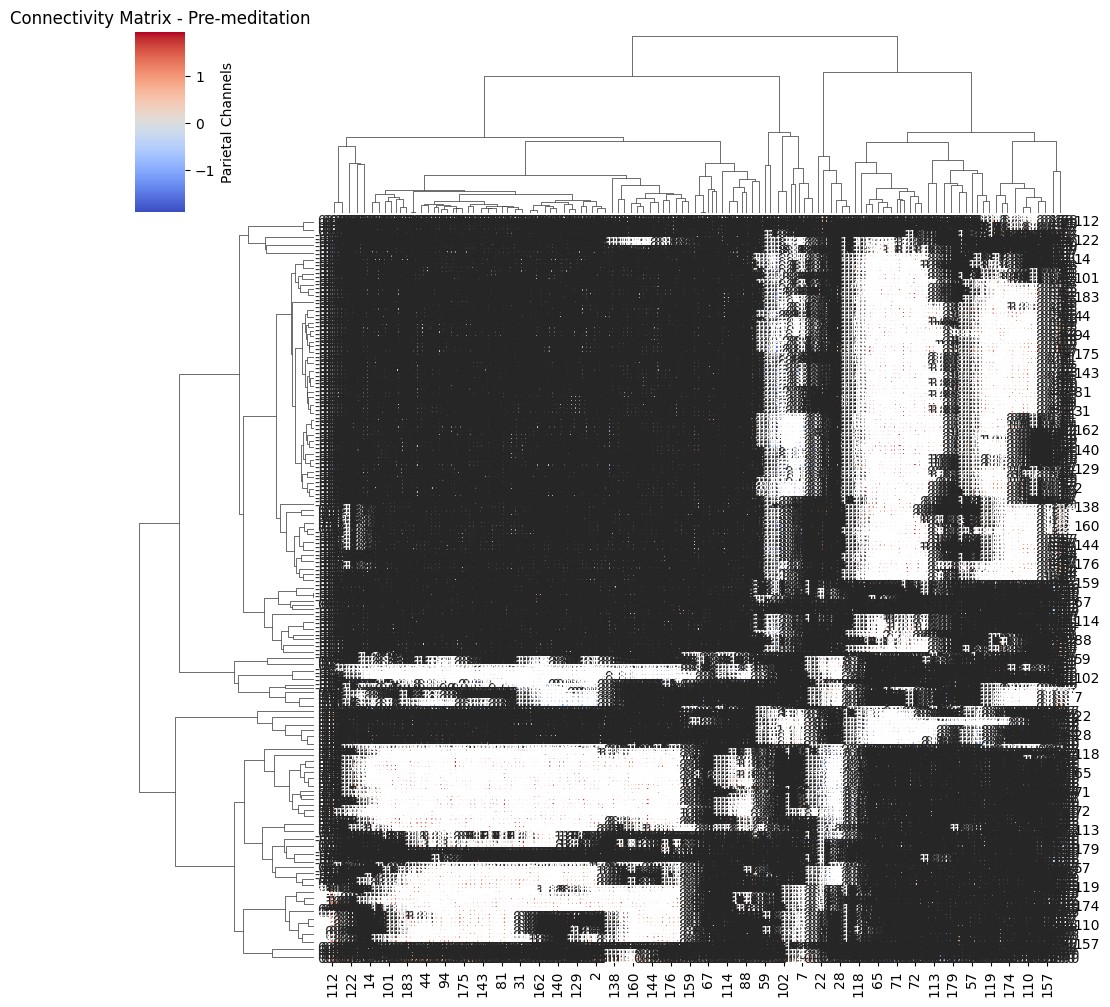

In [ ]:
plt.figure(figsize=(8, 6))
sns.clustermap(correlation_diff, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Connectivity Matrix - Pre-meditation')
plt.xlabel('Frontal Channels')
plt.ylabel('Parietal Channels')
plt.show()

# Frequency Band Analysis

In [ ]:
lowcut = 0.5 # Hz
highcut = 50 # Hz
order = 4
freqs = [0, 50] # Hz
q = 30
sampling_freq= 250

In [ ]:
print(len(suriya_baseline))
print(len(suriya_post))

75000
75000


In [ ]:
import brainsurf.preprocessing.filtering as filter
suriya_pre = filter.butter_bandpass_filter(suriya_baseline['E2'], lowcut,highcut , sampling_freq, order) 
suriya_post_x = filter.butter_bandpass_filter(suriya_post['E2'], lowcut,highcut , sampling_freq, order) 



In [ ]:
import brainsurf.analysis.power_spectrum as psd
frequence_bands_pre = psd.extract_frequency_bands(suriya_pre)
frequence_bands_post = psd.extract_frequency_bands(suriya_post_x)

In [ ]:
alpha = frequence_bands_pre['alpha']
beta = frequence_bands_pre['beta']
theta = frequence_bands_pre['theta']
delta = frequence_bands_pre['delta']
pre_bands = pd.DataFrame({'alpha': alpha, 'beta': beta, 'delta': delta, 'theta': theta})


In [ ]:
alpha = frequence_bands_post['alpha']
beta = frequence_bands_post['beta']
theta = frequence_bands_post['theta']
delta = frequence_bands_post['delta']
post_bands = pd.DataFrame({'alpha': alpha, 'beta': beta, 'delta': delta, 'theta': theta})

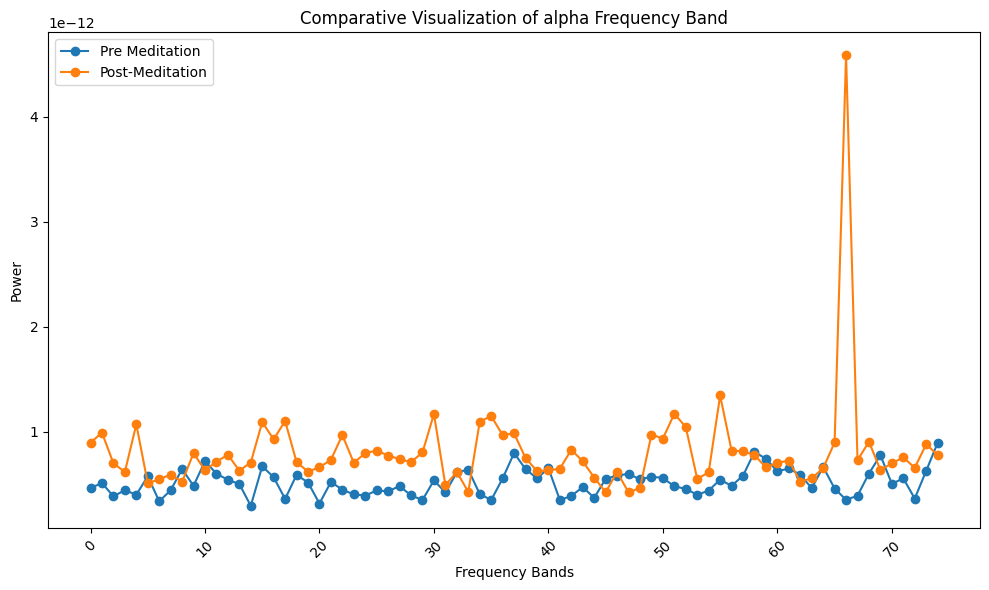

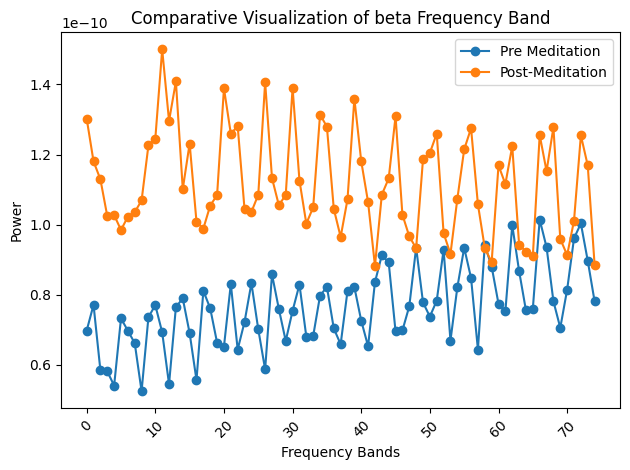

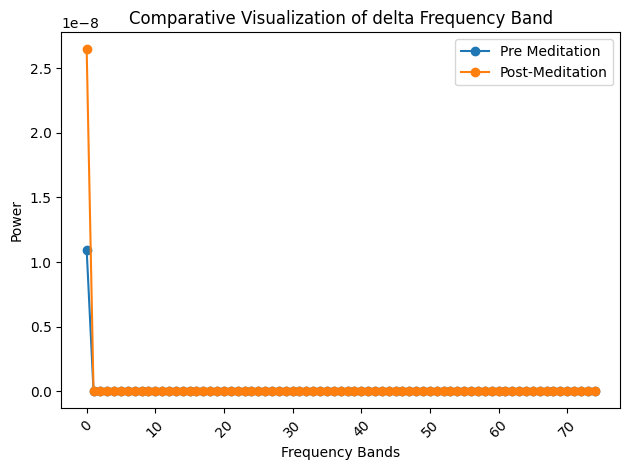

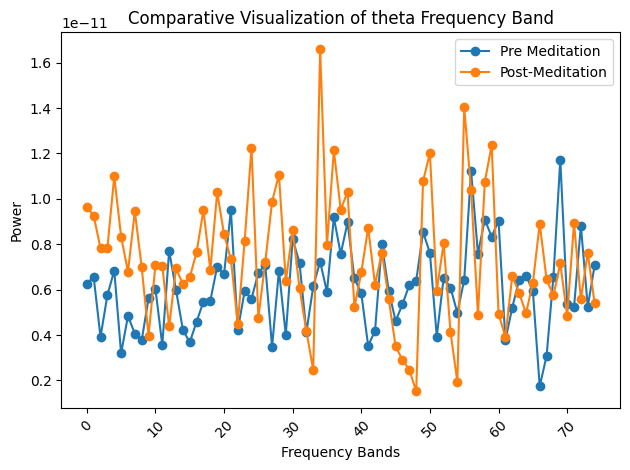

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Iterate through each frequency band column
for band in pre_bands.columns:
    # Plot the meditators data
    plt.plot(pre_bands.index, pre_bands[band], marker='o', linestyle='-', label='Pre Meditation')

    # Plot the non-meditators data
    plt.plot(post_bands.index, post_bands[band], marker='o', linestyle='-', label='Post-Meditation')

    # Add labels and title
    plt.xlabel('Frequency Bands')
    plt.ylabel('Power')
    plt.title(f'Comparative Visualization of {band} Frequency Band')
    plt.xticks(rotation=45)
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()
